# Exercise 1 - Probability Theory and Statistics

## Problem 1

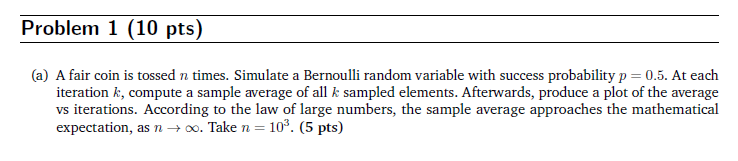

In [20]:
import numpy as np
import matplotlib.pyplot as plt

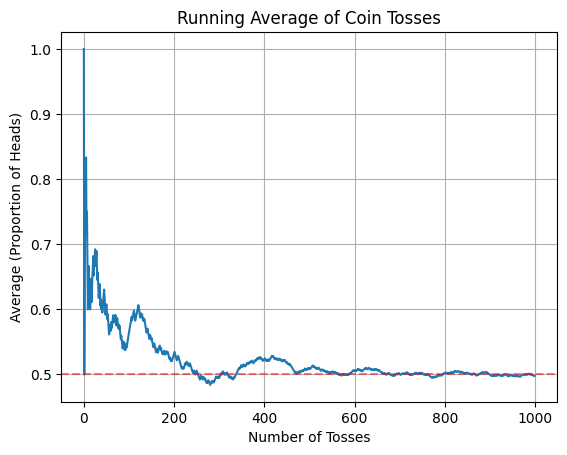

In [21]:
coin_results = np.random.choice(a=[0, 1], p=[0.5, 0.5], size=1000)

averages = [np.mean(coin_results[:i+1]) for i in range(1000)]

plt.plot(averages)
plt.title('Running Average of Coin Tosses')
plt.xlabel('Number of Tosses')
plt.ylabel('Average (Proportion of Heads)')
plt.grid(True)
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.5)


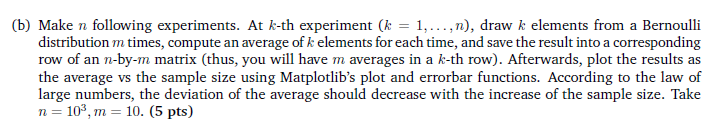

<ErrorbarContainer object of 3 artists>

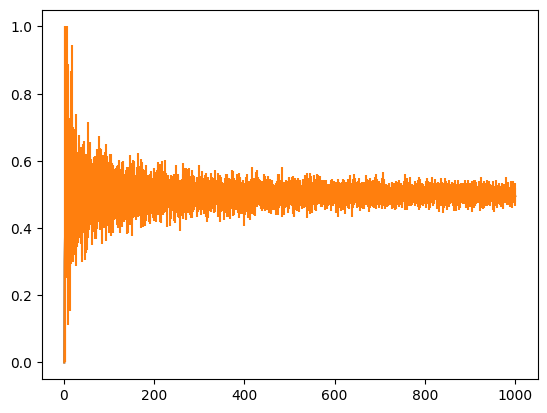

In [22]:

n=1000
m = 10

results = np.zeros((n, m))

for k in range(1, n+1):
    k_th_experiment = [np.mean(np.random.choice(a=[0,1], p=[0.5, 0.5], size=k)) for i in range(m)]
    results[k-1] = k_th_experiment

row_means = np.mean(results, axis=1)

y_errormin = row_means - np.min(results, axis=1)
y_errormax = np.max(results, axis=1) - row_means

y_error = [y_errormin, y_errormax]

plt.plot(range(1,n+1), row_means)
plt.errorbar(range(1,n+1), row_means, yerr=y_error)

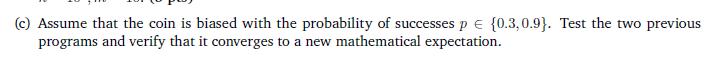

In [23]:
def plot_bernoulli(p):
    coin_results = np.random.choice(a=[0, 1], p=[1-p, p], size=1000)

    averages = [np.mean(coin_results[:i+1]) for i in range(1000)]

    plt.plot(averages)
    plt.title(f'Running Average of Coin Tosses (p = {p})')
    plt.xlabel('Number of Tosses')
    plt.ylabel('Average (Proportion of Heads)')
    plt.grid(True)
    plt.axhline(y=p, color='red', linestyle='--', alpha=0.5)


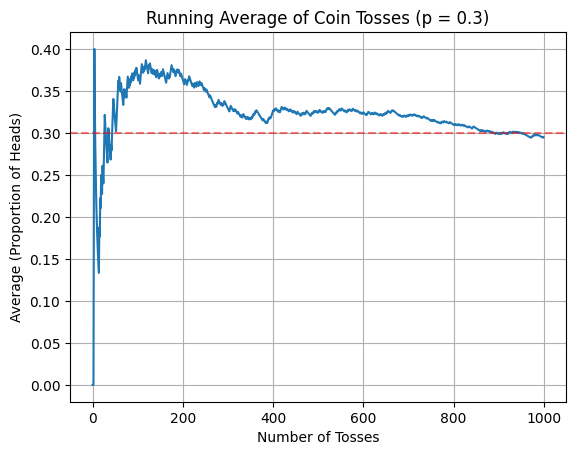

In [24]:
plot_bernoulli(0.3)

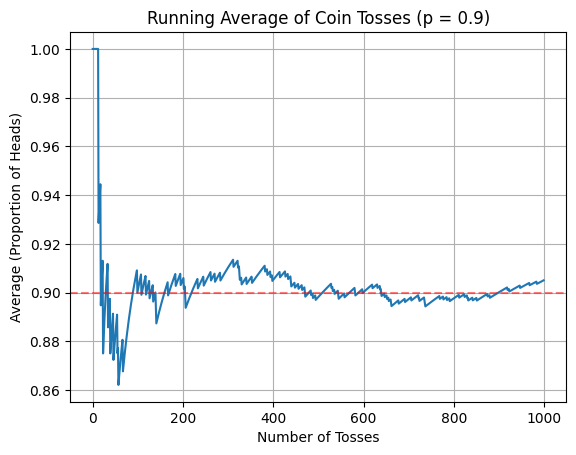

In [25]:
plot_bernoulli(0.9)

In [26]:
def plot_errorbar_bernoulli(p):
    
    n=1000
    m = 10

    results = np.zeros((n, m))

    for k in range(1, n+1):
        k_th_experiment = [np.mean(np.random.choice(a=[0,1], p=[1-p, p], size=k)) for i in range(m)]
        results[k-1] = k_th_experiment

    row_means = np.mean(results, axis=1)

    y_errormin = row_means - np.min(results, axis=1)
    y_errormax = np.max(results, axis=1) - row_means

    y_error = [y_errormin, y_errormax]

    plt.plot(range(1,n+1), row_means)
    plt.errorbar(range(1,n+1), row_means, yerr=y_error)

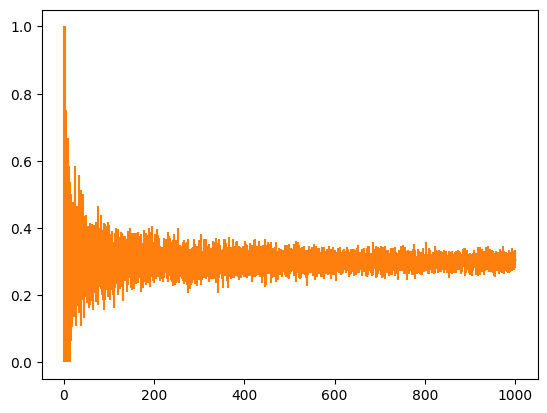

In [27]:
plot_errorbar_bernoulli(0.3)

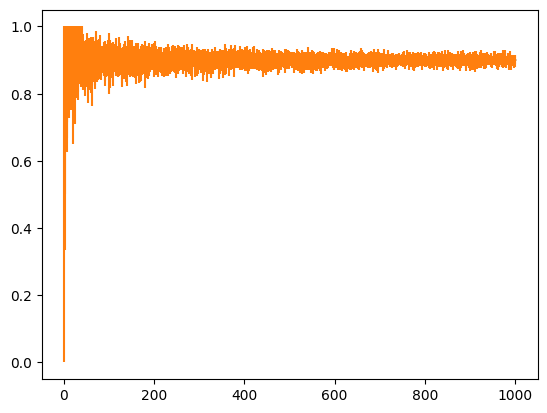

In [28]:
plot_errorbar_bernoulli(0.9)

## Problem 2

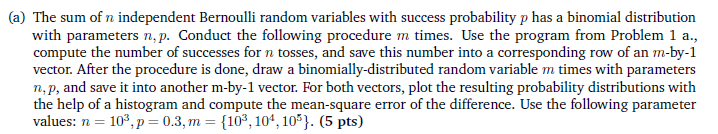

In [29]:
def mse(x):
    x_hat = np.mean(x)
    return np.mean(np.square(x - x_hat))

In [ ]:
n = 1000
p = 0.3
m = 100000

successes_of_each_experiment = np.zeros((1, m))

for i in range(m):
    coin_results = np.random.choice(a=[0, 1], p=[1-p, p], size=n)
    successes_of_each_experiment[0, i] = np.sum(coin_results)

binomial = np.random.binomial(n, p, size=m)

plt.figure(figsize=(10, 6))
plt.subplot(211)
plt.hist(successes_of_each_experiment.T, bins='auto')
plt.title('Histogram of Successes in Each Experiment')
plt.xlabel('Number of Successes')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(212)
plt.hist(binomial, bins='auto')
plt.title('Histogram of Binomial Samples')
plt.xlabel('Number of Successes')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

difference_vector = binomial - successes_of_each_experiment
mse_difference = mse(binomial - successes_of_each_experiment)
print(np.mean(binomial - successes_of_each_experiment))
print(mse_difference)

TypeError: 'other' must be an instance of matplotlib.axes._base._AxesBase, not a bool

<Figure size 1000x600 with 0 Axes>

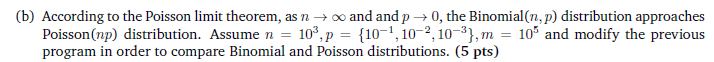

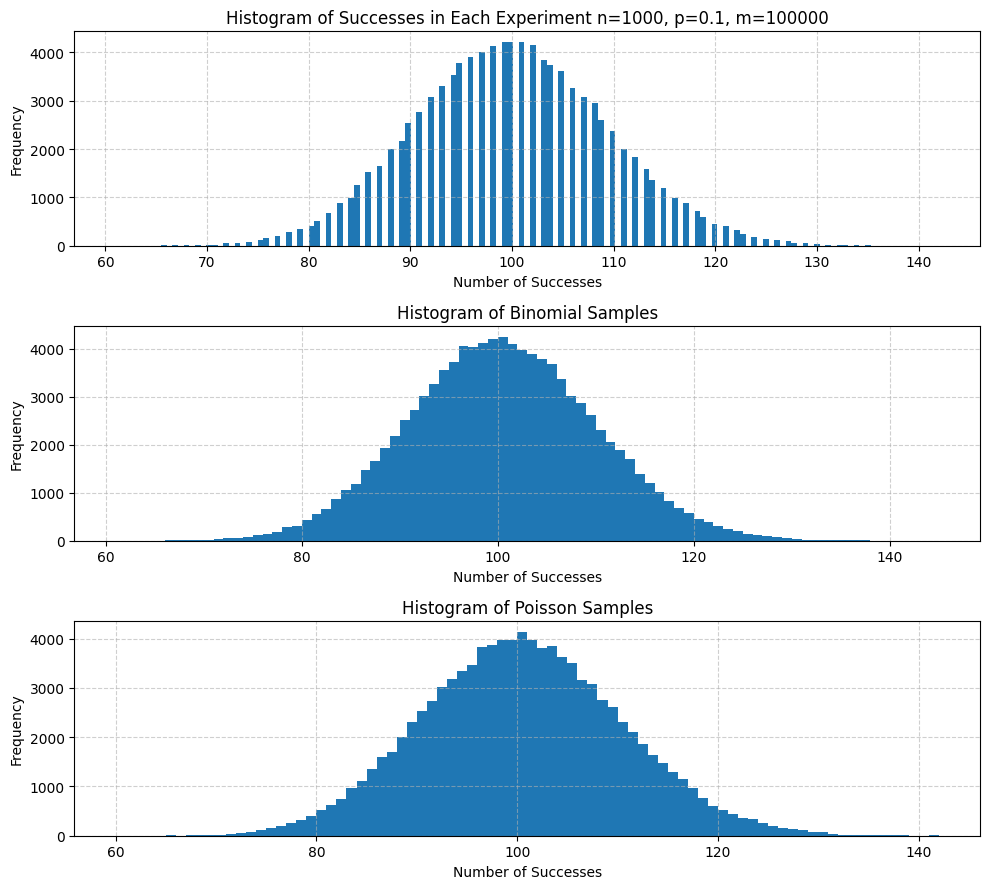

Mean Error with binomial: 0.03643
MSE binomial: 180.1020828551
Mean Error with Poisson: 0.0591
MSE Poisson: 189.65292719
Mean Error between Poisson and Binomial: 0.0591
MSE between Poisson and Binomial: 189.65292719


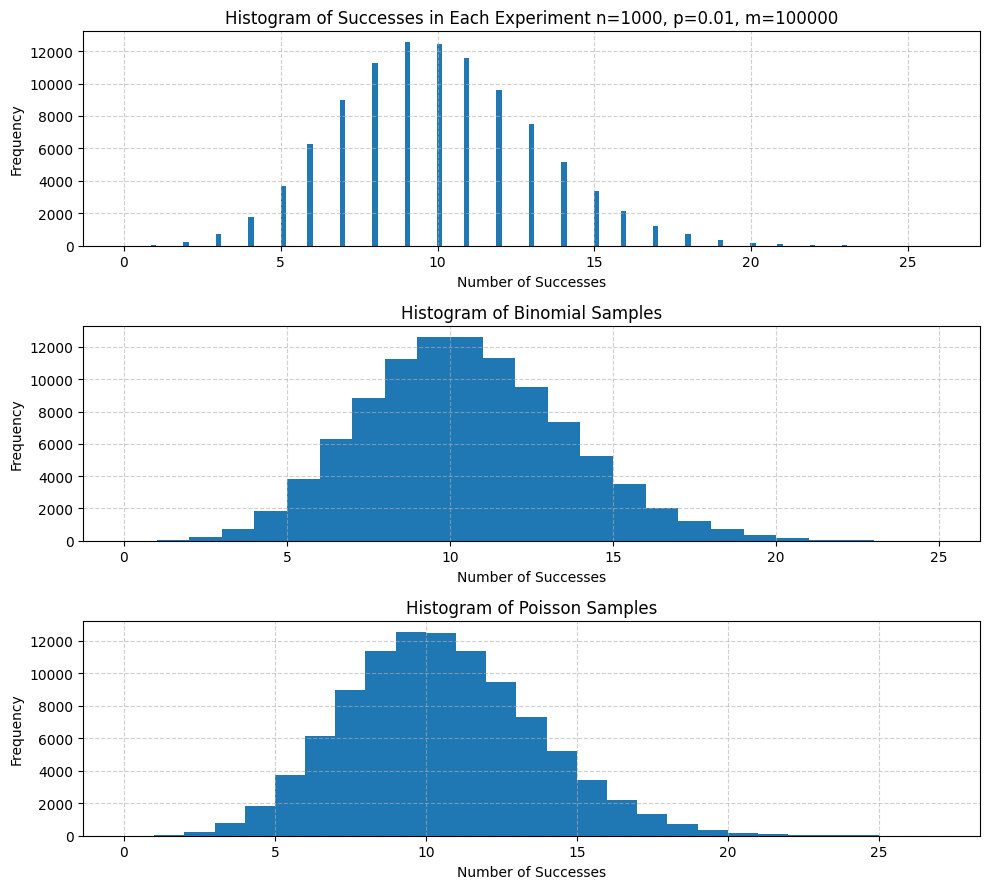

Mean Error with binomial: -0.01335
MSE binomial: 19.7393517775
Mean Error with Poisson: 0.009
MSE Poisson: 19.901659
Mean Error between Poisson and Binomial: 0.009
MSE between Poisson and Binomial: 19.901659


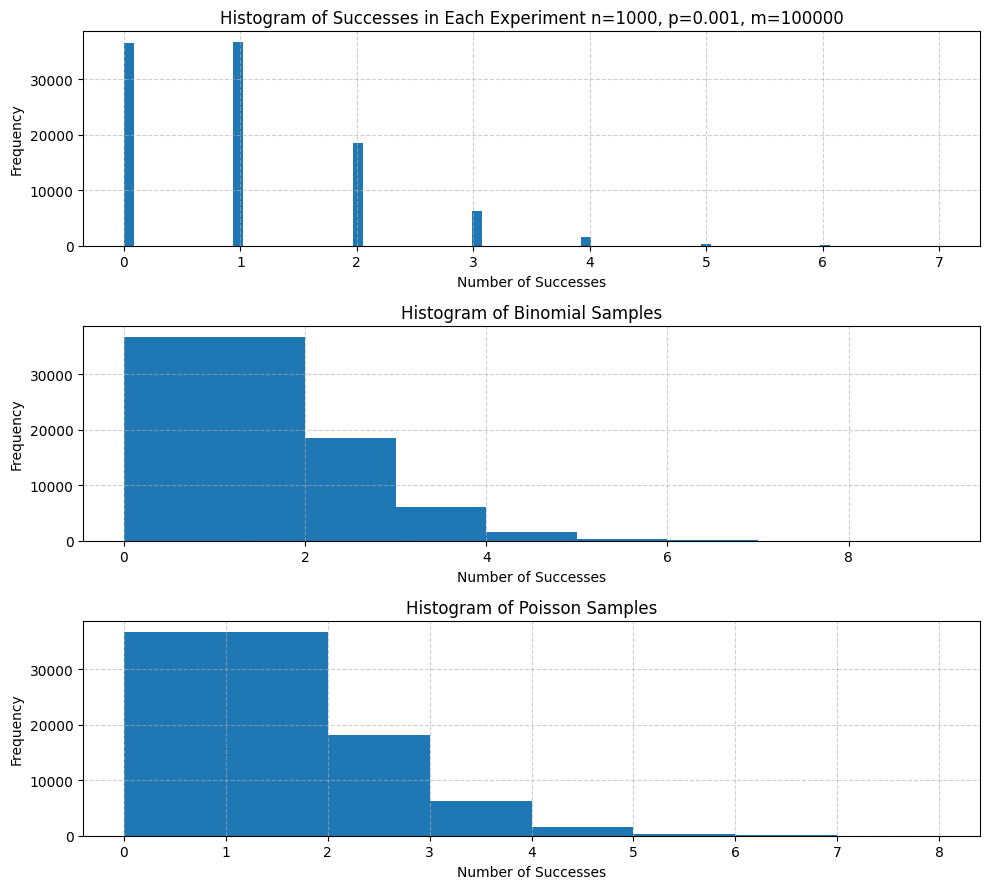

Mean Error with binomial: -0.00238
MSE binomial: 1.9906543355999997
Mean Error with Poisson: -0.00412
MSE Poisson: 2.0080630256000003
Mean Error between Poisson and Binomial: -0.00412
MSE between Poisson and Binomial: 2.0080630256000003


In [31]:
def compare_binomial_and_poisson(n, p, m):
    successes_of_each_experiment = np.zeros((1, m))

    for i in range(m):
        coin_results = np.random.choice(a=[0, 1], p=[1-p, p], size=n)
        successes_of_each_experiment[0, i] = np.sum(coin_results)

    binomial = np.random.binomial(n, p, size=m)
    poisson = np.random.poisson(n* p, size=m)
    
    plt.figure(figsize=(10, 9))
    plt.subplot(311)
    plt.hist(successes_of_each_experiment.T, bins='auto')
    plt.title(f'Histogram of Successes in Each Experiment n={n}, p={p}, m={m}')
    plt.xlabel('Number of Successes')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.subplot(312)
    plt.hist(binomial, bins='auto')
    plt.title('Histogram of Binomial Samples')
    plt.xlabel('Number of Successes')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.subplot(313)
    plt.hist(poisson, bins='auto')
    plt.title('Histogram of Poisson Samples')
    plt.xlabel('Number of Successes')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

    # difference_vector = binomial - successes_of_each_experiment
    mse_difference = mse(binomial - successes_of_each_experiment)
    print(f'Mean Error with binomial: {np.mean(binomial - successes_of_each_experiment)}')
    print(f'MSE binomial: {mse_difference}')

    mse_difference = mse(poisson - successes_of_each_experiment)
    print(f'Mean Error with Poisson: {np.mean(poisson - successes_of_each_experiment)}')
    print(f'MSE Poisson: {mse_difference}')

    mse_difference = mse(poisson - successes_of_each_experiment)
    print(f'Mean Error between Poisson and Binomial: {np.mean(poisson - successes_of_each_experiment)}')
    print(f'MSE between Poisson and Binomial: {mse_difference}')


compare_binomial_and_poisson(1000, 0.1, 100000)
compare_binomial_and_poisson(1000, 0.01, 100000)
compare_binomial_and_poisson(1000, 0.001, 100000)

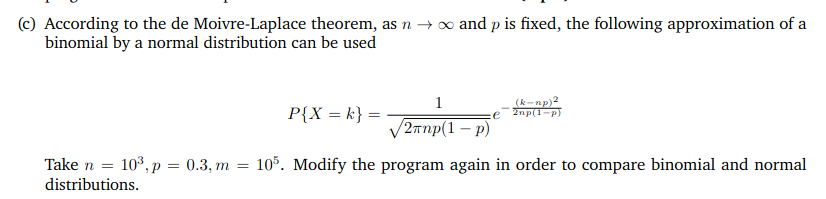

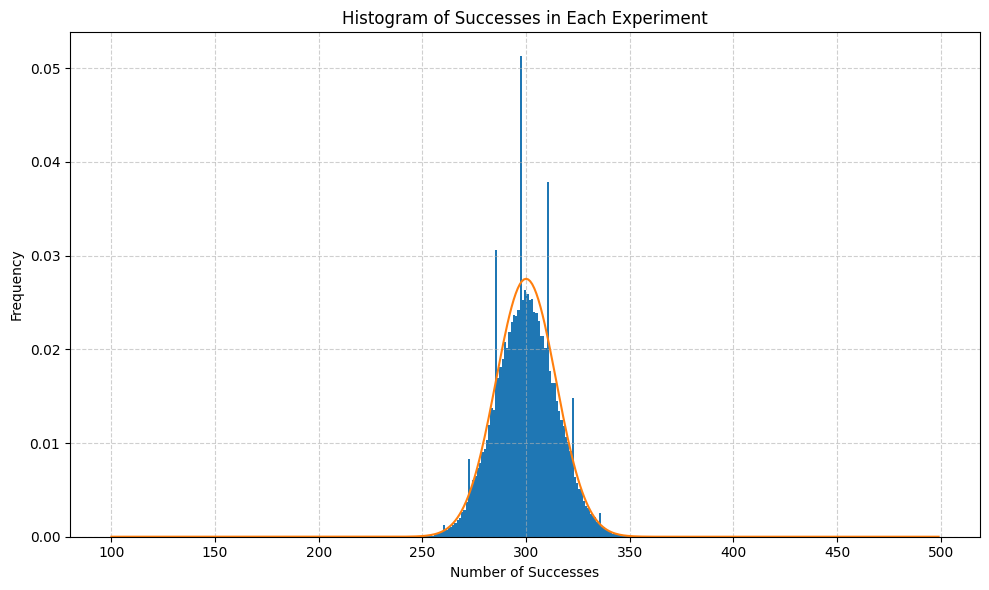

In [32]:
n = 1000
p = 0.3
m = 100000

successes_of_each_experiment = np.zeros((1, m))

for i in range(m):
    coin_results = np.random.choice(a=[0, 1], p=[1-p, p], size=n)
    successes_of_each_experiment[0, i] = np.sum(coin_results)

k = np.arange(100, 500)
pdf_normal = np.exp((np.square(k - n*p)) / (-2*n*p*(1-p))) / np.sqrt(2* np.pi * n * p * (1-p))

plt.figure(figsize=(10, 6))
plt.hist(successes_of_each_experiment.T, bins='scott', density=True)
plt.title('Histogram of Successes in Each Experiment')
plt.xlabel('Number of Successes')
plt.ylabel('Frequency')

plt.plot(k, pdf_normal, alpha=1)

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

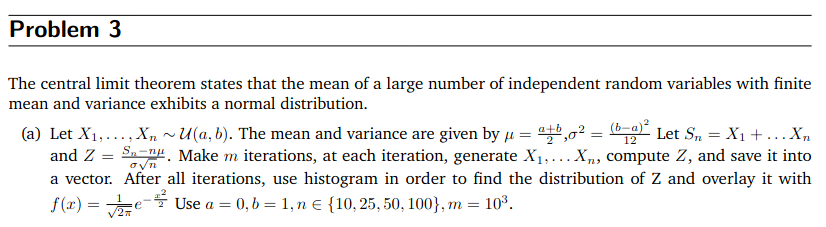

In [33]:
def generate_pdf_normal(mean, sigma_2):
    sigma = np.sqrt(sigma_2)
    x = np.linspace(mean + 7*sigma, mean - 7*sigma)
    return x, np.exp(-np.square( x - mean)/(2*sigma_2)) / (np.sqrt(2 * np.pi * sigma_2))

In [34]:
def plot_histogram(y, figsize=(10, 6), bins='auto', title='', xlabel='', ylabel='', alpha='0.6', prob=None):
    # plt.figure(figsize=figsize)
    plt.hist(y, bins, density=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    if (prob!= None):
        plt.plot(prob, alpha=alpha)

    plt.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()

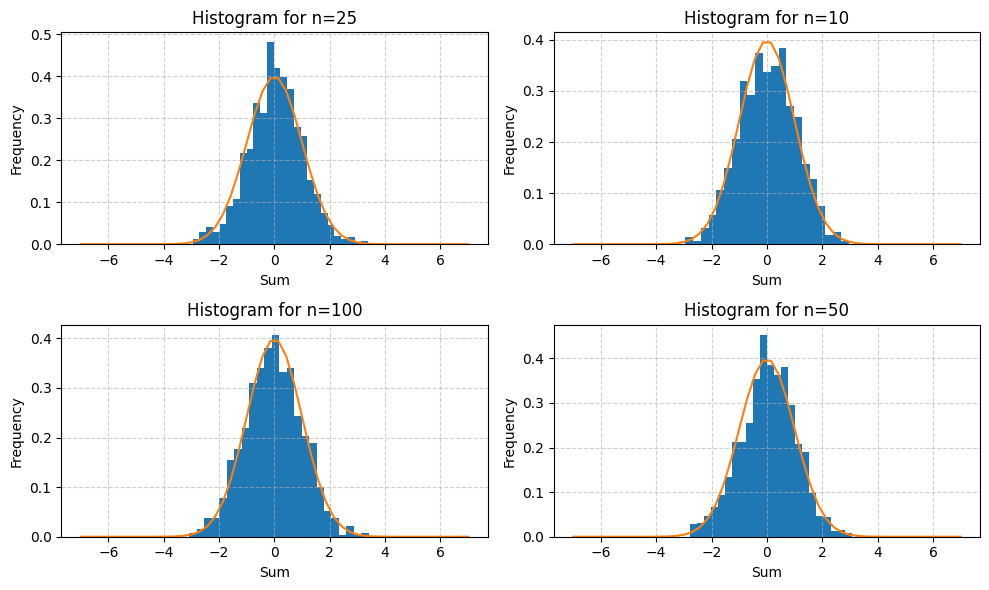

In [35]:
m = 1000
a = 0
b = 1
N_values = {10, 25, 50, 100}

mi = (a+b)/2.0
sigma_2 = (b-a)*(b-a)/12.0
sigma = np.sqrt(sigma_2)

plt.figure(figsize=(10, 6))

cont = 1

xn, pdf_normal = generate_pdf_normal(0, 1)

for n in N_values:
    z = np.zeros(m)
    for i in range(m):
        x = np.random.uniform(a, b, size=n)

        Sn = np.sum(x)
        z[i] = (Sn - n*mi)/(sigma * np.sqrt(n))

    plt.subplot(2, 2, cont)
    cont+=1
    plot_histogram(z, title=f'Histogram for n={n}', xlabel='Sum', ylabel='Frequency')
    plt.plot(xn, pdf_normal)
plt.show()

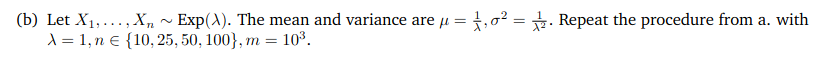

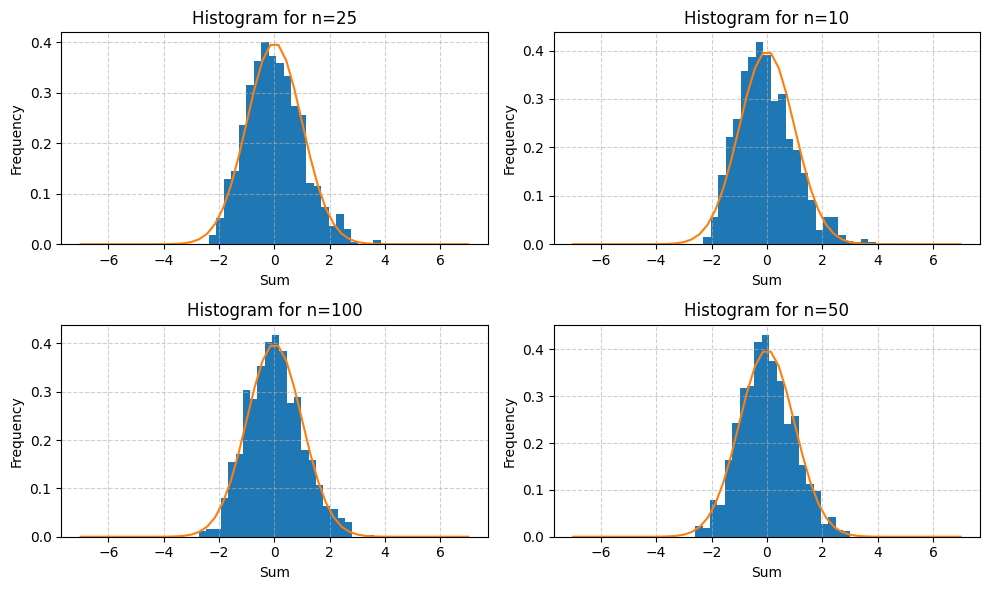

In [36]:
m = 1000
N_values = {10, 25, 50, 100}
lamb = 1

mi = 1/lamb
sigma_2 = mi*mi

pdf_normal = generate_pdf_normal(mi, sigma_2)

plt.figure(figsize=(10, 6))

cont = 1

xn, pdf_normal = generate_pdf_normal(0, 1)

for n in N_values:
    z = np.zeros(m)
    for i in range(m):
        x = np.random.exponential(1/lamb, size=n)

        Sn = np.sum(x)
        z[i] = (Sn - n*mi)/(np.sqrt(n * sigma_2))

    plt.subplot(2, 2, cont)
    cont+=1
    plot_histogram(z, title=f'Histogram for n={n}', xlabel='Sum', ylabel='Frequency')
    plt.plot(xn, pdf_normal)
plt.show()



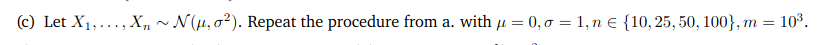

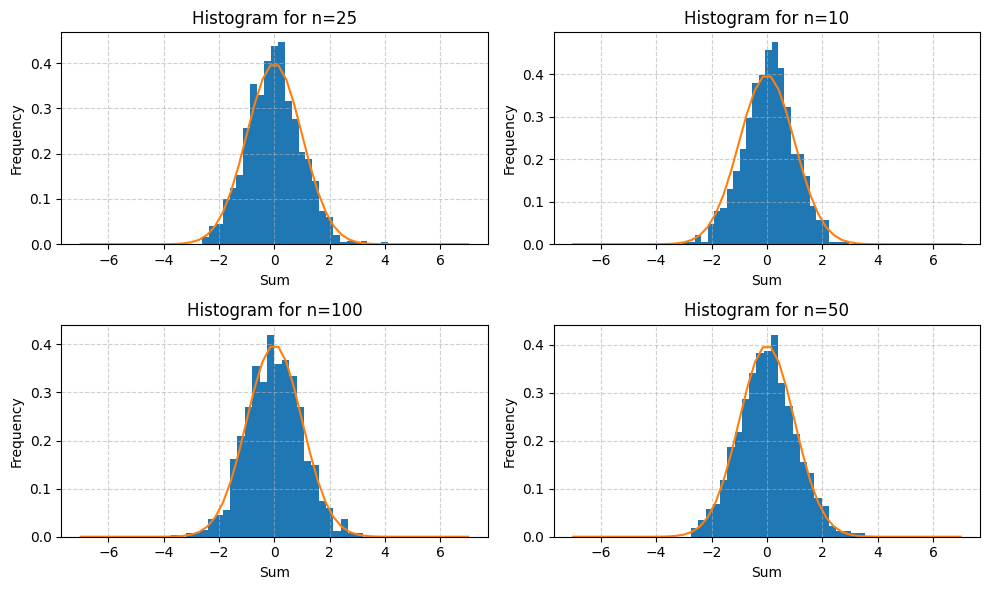

In [37]:
m = 1000
N_values = {10, 25, 50, 100}
lamb = 1

mi = 0
sigma_2 = 1
sigma = np.sqrt(sigma_2)

pdf_normal = generate_pdf_normal(mi, sigma_2)

plt.figure(figsize=(10, 6))

cont = 1

xn, pdf_normal = generate_pdf_normal(0, 1)

for n in N_values:
    z = np.zeros(m)
    for i in range(m):
        x = np.random.normal(mi, sigma, size=n)

        Sn = np.sum(x)
        z[i] = (Sn - n*mi)/(np.sqrt(n * sigma_2))

    plt.subplot(2, 2, cont)
    cont+=1
    plot_histogram(z, title=f'Histogram for n={n}', xlabel='Sum', ylabel='Frequency')
    plt.plot(xn, pdf_normal)
plt.show()



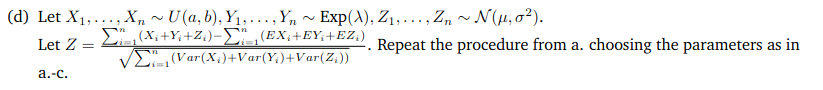

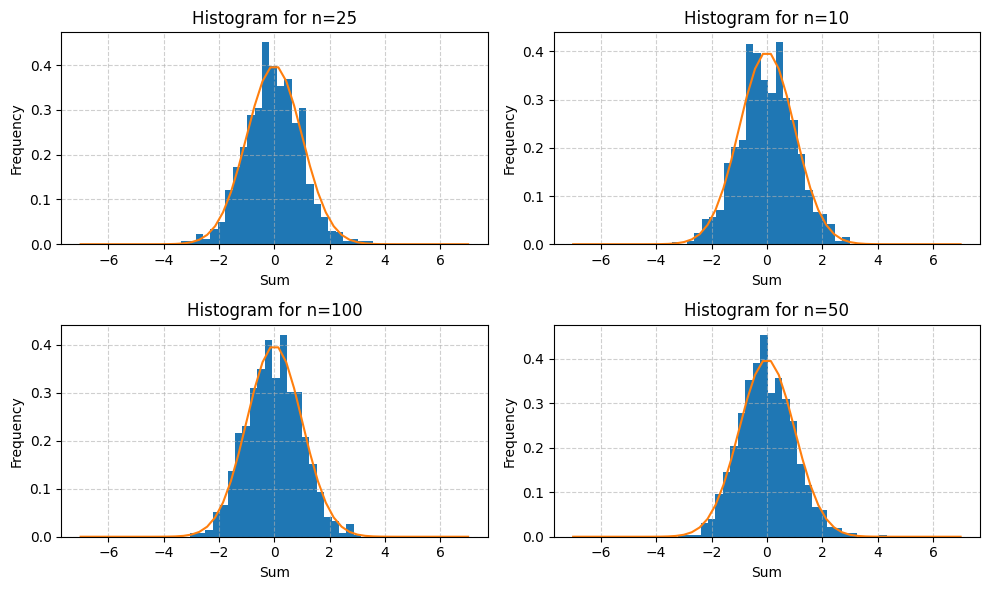

In [38]:
m = 1000
N_values = {10, 25, 50, 100}
lamb = 1

mi = 0
sigma_2 = 1
sigma = np.sqrt(sigma_2)

a = 0
b = 1
mi_uniform = (a+b)/2
sigma2_uniform = (b-a)*(b-a)/12

lamb = 1
mi_exp = 1/lamb
sigma2_exp = 1/(lamb * lamb)

pdf_normal = generate_pdf_normal(mi, sigma_2)

plt.figure(figsize=(10, 6))

cont = 1

xn, pdf_normal = generate_pdf_normal(0, 1)

for n in N_values:
    z = np.zeros(m)
    for i in range(m):
        x = np.random.normal(mi, sigma, size=n)
        x_uniform = np.random.uniform(a, b, size=n)
        x_exp = np.random.exponential(1/lamb, size=n)

        Sn = np.sum(x + x_uniform + x_exp)

        z[i] = (Sn - n*(mi + mi_uniform + mi_exp))/(np.sqrt(n * (sigma_2 + sigma2_exp + sigma2_uniform)))

    plt.subplot(2, 2, cont)
    cont+=1
    plot_histogram(z, title=f'Histogram for n={n}', xlabel='Sum', ylabel='Frequency')
    plt.plot(xn, pdf_normal)
plt.show()

